# Part 0. Some formalities

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 17sCcCTtX6QDyrF54SrgglXKNUfcBVbo8 # I uploaded the given dataset to my Google Drive to avoid importing it manually every session
# File isn't changed at all

Downloading...
From: https://drive.google.com/uc?id=17sCcCTtX6QDyrF54SrgglXKNUfcBVbo8
To: /content/dataset_for_datascience_assignment.csv
100% 5.34M/5.34M [00:00<00:00, 101MB/s]


In [ ]:
data = pd.read_csv('/content/dataset_for_datascience_assignment.csv')

# Part 1. Preprocessing and feature analysis

First of all, let's have a look at sample and columns:

In [ ]:
data.sample(10)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
9720,2019-09-14 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,9721,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
17056,2019-09-23 00:00:00.000,FIN,1,1.0,0.0,2019-09-23 00:00:00.000,2019-09-23 00:00:00.000,17057,0.0,1.0,...,1.0,0.0,NaN,True,1.0,2.0,NaN,NaN,2.517,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2932,2019-09-05 00:00:00.000,DNK,1,1.0,0.0,2019-09-05 00:00:00.000,2019-09-05 00:00:00.000,2933,0.0,0.0,...,1.0,0.0,NaN,True,23.0,5.0,NaN,NaN,3.560,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
16877,2019-09-22 00:00:00.000,DNK,6,4.0,2.0,2019-10-03 00:00:00.000,2020-02-07 00:00:00.000,16878,0.0,3.0,...,0.0,6.0,NaN,False,21.0,2.0,25.0,13.0,11.329,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
13754,2019-09-19 00:00:00.000,FIN,1,1.0,0.0,2019-09-21 00:00:00.000,2019-09-21 00:00:00.000,13755,0.0,1.0,...,0.0,1.0,NaN,False,8.0,4.0,NaN,NaN,4.462,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
15938,2019-09-22 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,15939,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5625,2019-09-08 00:00:00.000,FIN,4,4.0,0.0,2020-09-07 00:00:00.000,2020-10-26 00:00:00.000,5626,1.0,2.0,...,0.0,0.0,NaN,True,11.0,1.0,16.0,21.0,6.117,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
10653,2019-09-15 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,10654,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
16943,2019-09-23 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,16944,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
8713,2019-09-13 00:00:00.000,FIN,24,24.0,0.0,2019-09-13 00:00:00.000,2020-10-16 00:00:00.000,8714,1.0,14.0,...,0.0,24.0,"[\n ""italian"",\n ""middle eastern""\n]",False,2.0,2.0,17.0,10.0,0.555,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [ ]:
data.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE'],
      dtype='object')

First of all, let's analyze the NaN values and handle them properly:

In [ ]:
data.isna().sum()

,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,9955
PURCHASE_COUNT_TAKEAWAY,9955
FIRST_PURCHASE_DAY,10019
LAST_PURCHASE_DAY,9956
USER_ID,0
BREAKFAST_PURCHASES,9955
LUNCH_PURCHASES,9955


Let's visualize NaN values to see some correlations:

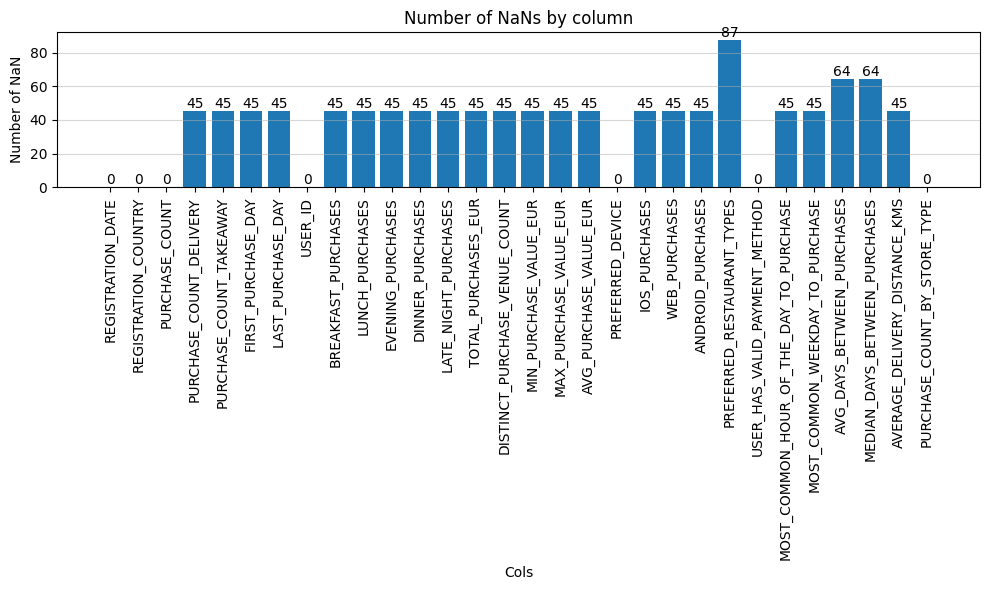

In [ ]:
nan_counts = data.isna().mean() * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(nan_counts.index, nan_counts.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Number of NaNs by column')
plt.xlabel('Cols')
plt.ylabel('Number of NaN')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

And a heatmap:

<Axes: >

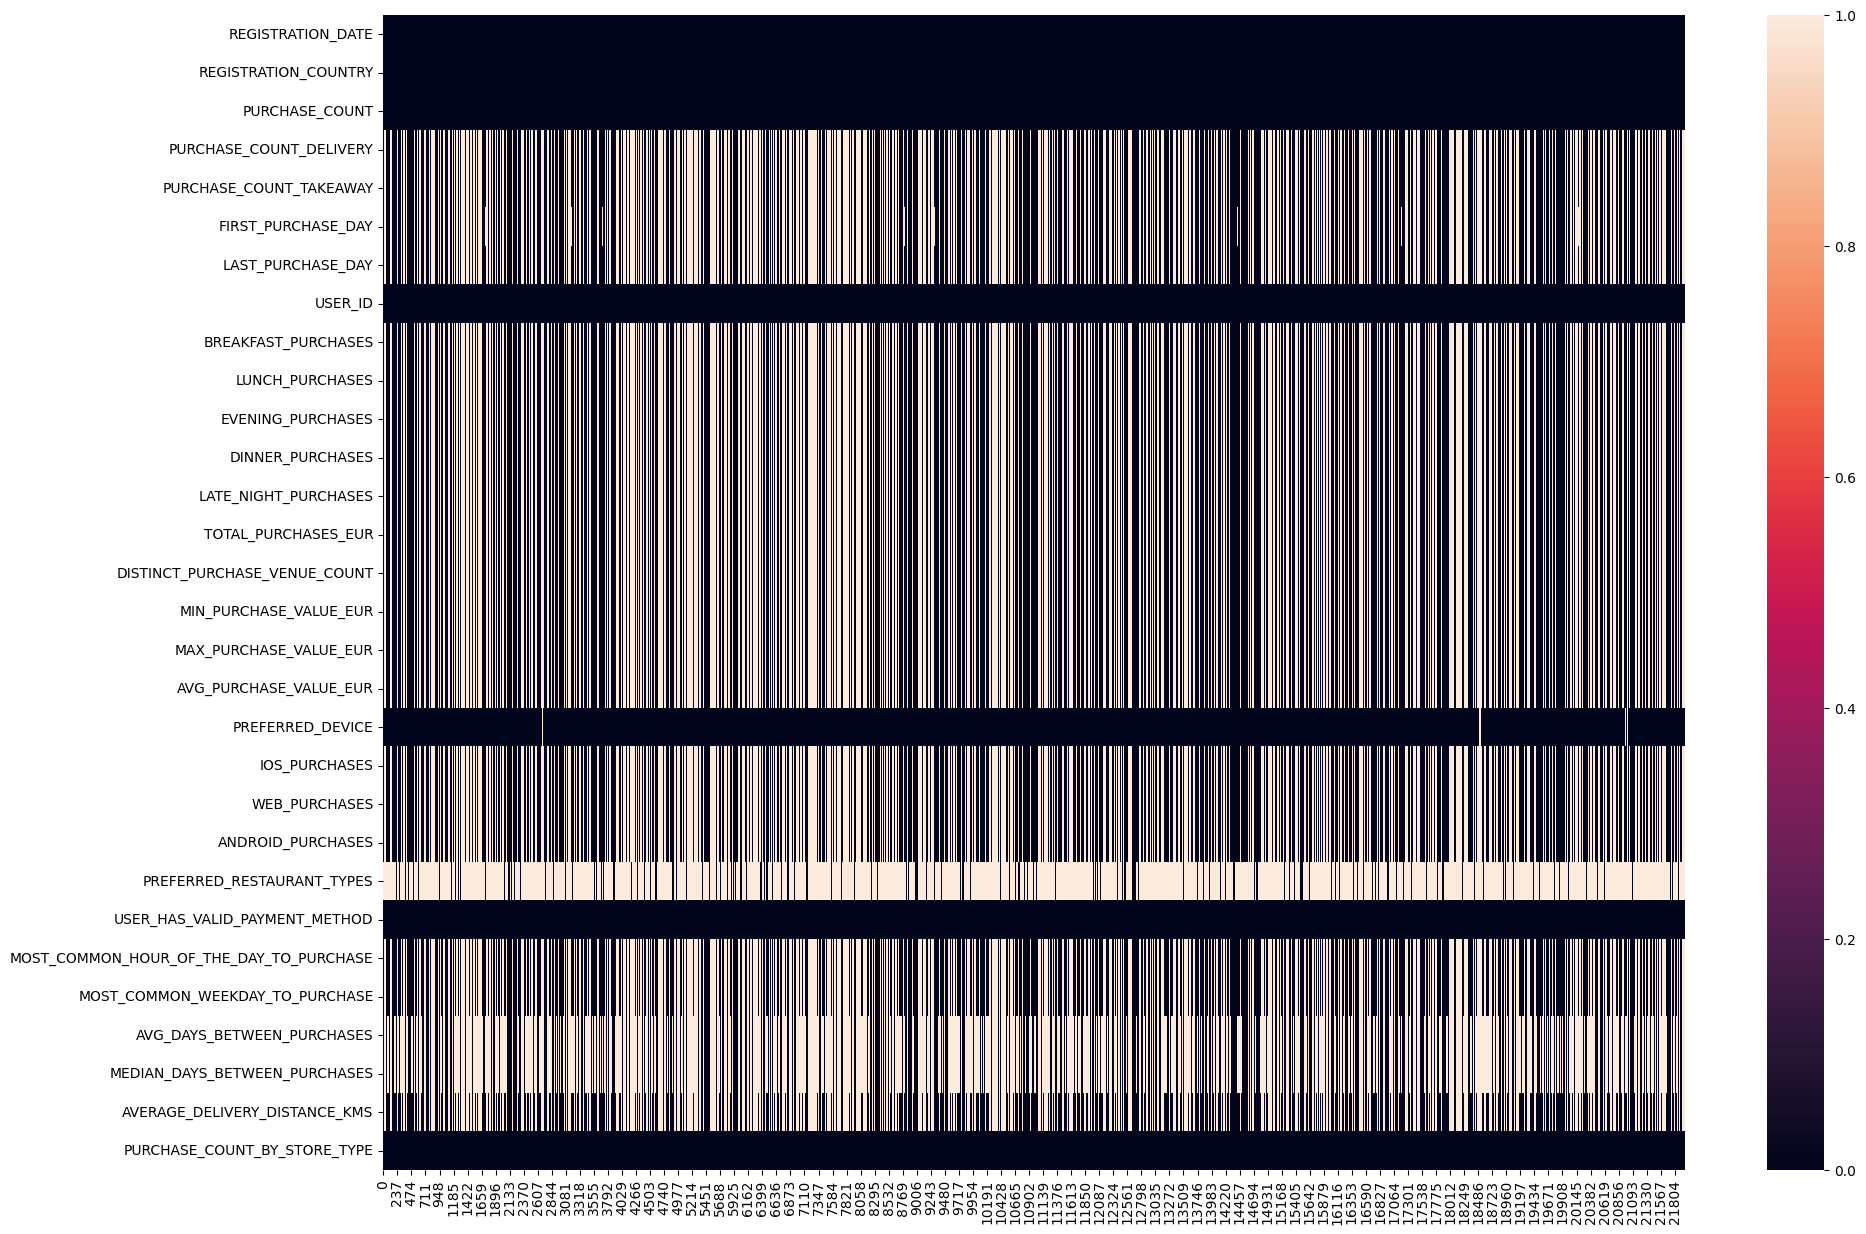

In [ ]:
plt.figure(figsize=(21,15))
sns.heatmap(data.isna().transpose())

The number on NaNs in certain columns surely corresponds, so let's try to identify the connection. From the ditribution of NaNs it seems like rows where users made 0 purchases produce the NaNs, because similar amount of NaNs appear in purchase-related columns.

So, let's divide the dataset into 2 - first with no-purchase clients and second with those who made at least one.

In [ ]:
data_0 = data[data['PURCHASE_COUNT'] == 0]
data_more_than_0 = data[data['PURCHASE_COUNT'] > 0]

# Part 2. Analysis of inactive users (non-buyers)

Let's start with analyzing the `data_0`:

In [ ]:
data_0.isna().sum()

,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,9955
PURCHASE_COUNT_TAKEAWAY,9955
FIRST_PURCHASE_DAY,9955
LAST_PURCHASE_DAY,9955
USER_ID,0
BREAKFAST_PURCHASES,9955
LUNCH_PURCHASES,9955


We can conclude that purchase-related columns don't bring anything new to the table (all rows are NaNs), so we assuredly drop them:

In [ ]:
useless_cols_for_non_buyers = [i for i in data_0.columns if data_0[i].isna().sum() > 9900]
data_0.drop(columns=useless_cols_for_non_buyers, inplace=True)

Columns `PURCHASE_COUNT`, `PURCHASE_COUNT_BY_STORE_TYPE` are useless, because they have the same value for everyone in `data_0`, also  `USER_ID` doesn't make sense, because primary keys don't bring any statistically significant information.

In [ ]:
data_0.drop(columns=['PURCHASE_COUNT', 'USER_ID', 'PURCHASE_COUNT_BY_STORE_TYPE'], inplace=True)

In [ ]:
data_0.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PREFERRED_DEVICE,USER_HAS_VALID_PAYMENT_METHOD
0,2019-09-01 00:00:00.000,DNK,ios,False
3,2019-09-01 00:00:00.000,FIN,android,False
4,2019-09-01 00:00:00.000,GRC,android,False
5,2019-09-01 00:00:00.000,FIN,android,False
6,2019-09-01 00:00:00.000,DNK,ios,False


Now, let's have a look at the distribution of the columns left for Buyers and Non-buyers and try to identify any connections:

In [ ]:
# First, let's join all the rare countries into a new single class
data_0.loc[data_0['REGISTRATION_COUNTRY'].value_counts()[data_0['REGISTRATION_COUNTRY']].values < 1000, 'REGISTRATION_COUNTRY'] = 'rare_countries'

In [ ]:
data_0['REGISTRATION_COUNTRY'].value_counts() / data_0.shape[0]

,count
REGISTRATION_COUNTRY,
FIN,0.484782
DNK,0.310999
GRC,0.151683
rare_countries,0.052536


In [ ]:
# Same for buyers
data_more_than_0.loc[data_more_than_0['REGISTRATION_COUNTRY'].value_counts()[data_more_than_0['REGISTRATION_COUNTRY']].values < 1000, 'REGISTRATION_COUNTRY'] = 'rare_countries'

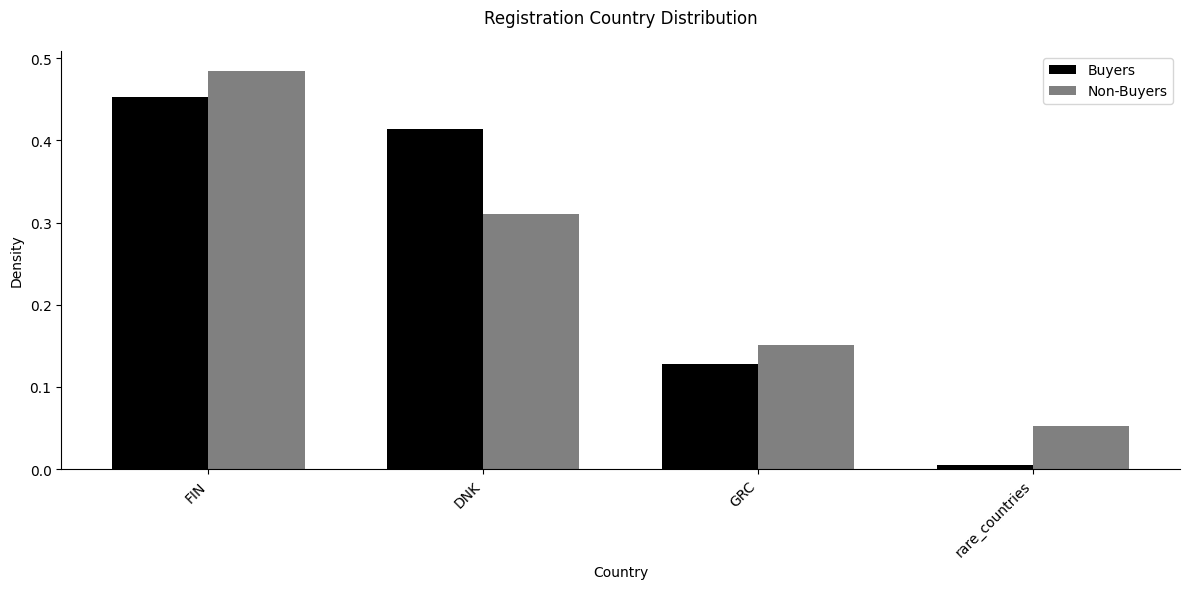

In [ ]:
# Creating DF with partitions for countries
buyers = data_more_than_0['REGISTRATION_COUNTRY'].value_counts(normalize=True).rename('Buyers')
non_buyers = data_0['REGISTRATION_COUNTRY'].value_counts(normalize=True).rename('Non-Buyers')

# Concat and fillna, just in case
comparison = pd.concat([buyers, non_buyers], axis=1).fillna(0)

# Sorting by the number of Buyers
comparison = comparison.sort_values(by='Buyers', ascending=False)

# Barplot creation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison.index))
width = 0.35

# Buyers bars
rects1 = ax.bar(
    x - width/2,
    comparison['Buyers'],
    width,
    color='black',
    label='Buyers'
)

# Non-buyers bars
rects2 = ax.bar(
    x + width/2,
    comparison['Non-Buyers'],
    width,
    color='grey',
    label='Non-Buyers'
)

# Plot settings
ax.set_title('Registration Country Distribution', pad=20)
ax.set_xlabel('Country')
ax.set_ylabel('Density')
ax.set_xticks(x)
ax.set_xticklabels(comparison.index, rotation=45, ha='right')
ax.legend()

sns.despine()
plt.tight_layout()
plt.show()

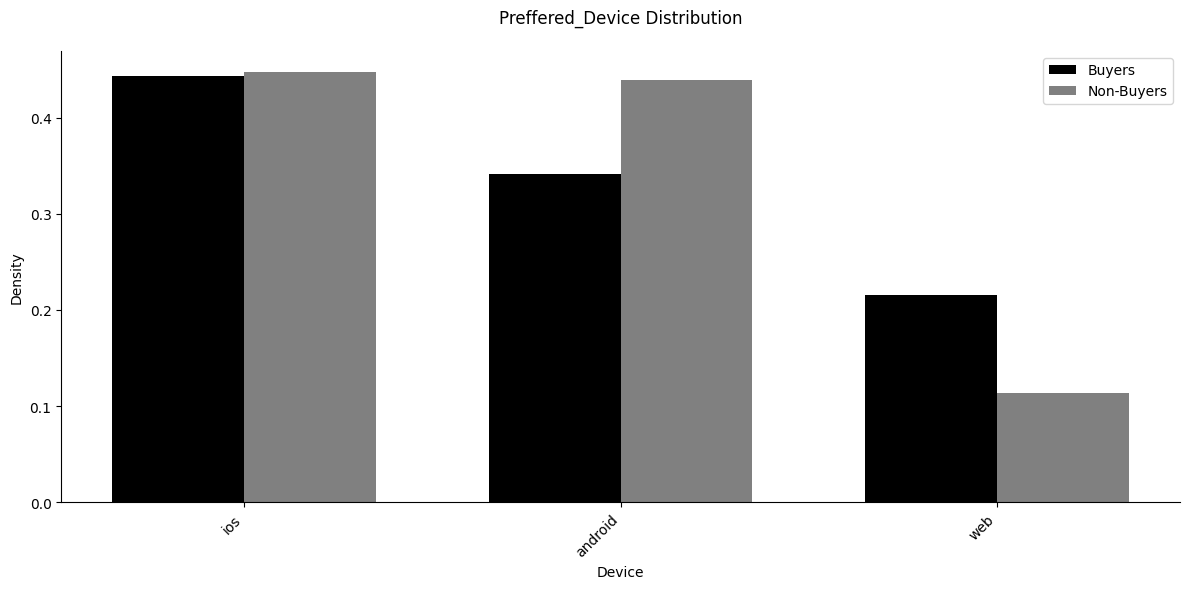

In [ ]:
# Creating DF with partitions for preferred devices
buyers = data_more_than_0['PREFERRED_DEVICE'].value_counts(normalize=True).rename('Buyers')
non_buyers = data_0['PREFERRED_DEVICE'].value_counts(normalize=True).rename('Non-Buyers')

# Concat and fillna, just in case
comparison = pd.concat([buyers, non_buyers], axis=1).fillna(0)

# Sorting by the number of Buyers
comparison = comparison.sort_values(by='Buyers', ascending=False)

# Barplot creation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison.index))
width = 0.35

# Buyers bars
rects1 = ax.bar(
    x - width/2,
    comparison['Buyers'],
    width,
    color='black',
    label='Buyers'
)

# Non-buyers bars
rects2 = ax.bar(
    x + width/2,
    comparison['Non-Buyers'],
    width,
    color='grey',
    label='Non-Buyers'
)

# Plot settings
ax.set_title('Preffered_Device Distribution', pad=20)
ax.set_xlabel('Device')
ax.set_ylabel('Density')
ax.set_xticks(x)
ax.set_xticklabels(comparison.index, rotation=45, ha='right')
ax.legend()

sns.despine()
plt.tight_layout()
plt.show()

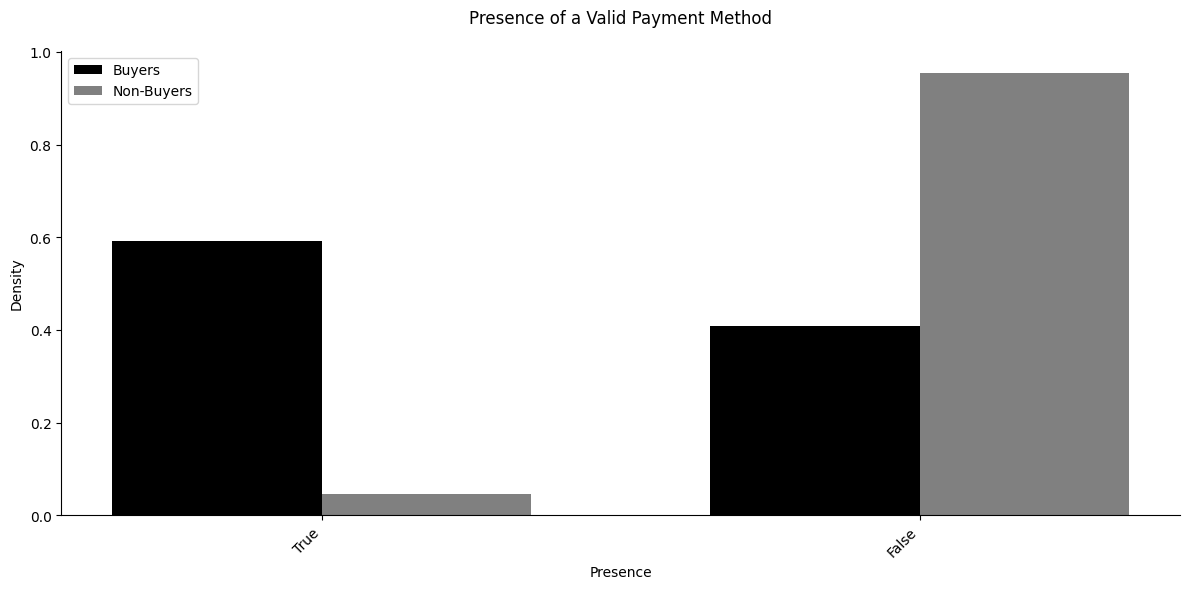

In [ ]:
# Creating DF with partitions for presence of payment method
buyers = data_more_than_0['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(normalize=True).rename('Buyers')
non_buyers = data_0['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(normalize=True).rename('Non-Buyers')

# Concat and fillna, just in case
comparison = pd.concat([buyers, non_buyers], axis=1).fillna(0)

# Sorting by the number of Buyers
comparison = comparison.sort_values(by='Buyers', ascending=False)

# Barplot creation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison.index))
width = 0.35

# Buyers bars
rects1 = ax.bar(
    x - width/2,
    comparison['Buyers'],
    width,
    color='black',
    label='Buyers'
)

# Non-buyers bars
rects2 = ax.bar(
    x + width/2,
    comparison['Non-Buyers'],
    width,
    color='grey',
    label='Non-Buyers'
)

# Plot settings
ax.set_title('Presence of a Valid Payment Method', pad=20)
ax.set_xlabel('Presence')
ax.set_ylabel('Density')
ax.set_xticks(x)
ax.set_xticklabels(comparison.index, rotation=45, ha='right')
ax.legend()

sns.despine()
plt.tight_layout()
plt.show()

# Part 3. Analysis of active users (buyers)

## Part 3.1. Preprocessing

First, let's have a look at NaNs for active users:

In [ ]:
data_more_than_0.isna().sum()

,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,0
PURCHASE_COUNT_TAKEAWAY,0
FIRST_PURCHASE_DAY,64
LAST_PURCHASE_DAY,1
USER_ID,0
BREAKFAST_PURCHASES,0
LUNCH_PURCHASES,0


We can see a non-significant amount of NaNs for `PREFERRED_DEVICE`, `LAST_PURCHASE_DAY`, `FIRST_PURCHASE_DAY`. Let's handle them very  straightforward - replace with mode/mean

In [ ]:
data_more_than_0['PREFERRED_DEVICE'].fillna(data_more_than_0['PREFERRED_DEVICE'].mode()[0], inplace=True)
data_more_than_0['LAST_PURCHASE_DAY'].fillna(data_more_than_0['LAST_PURCHASE_DAY'].mode()[0], inplace=True)
data_more_than_0['FIRST_PURCHASE_DAY'].fillna(data_more_than_0['FIRST_PURCHASE_DAY'].mode()[0], inplace=True)

In [ ]:
data_more_than_0.isna().sum()
# We define weird_cols as ones with abnormal amount of NaNs
weird_cols = [i for i in data_more_than_0.columns if data_more_than_0[i].isna().sum() > 0]

In [ ]:
weird_cols

['PREFERRED_RESTAURANT_TYPES',
 'AVG_DAYS_BETWEEN_PURCHASES',
 'MEDIAN_DAYS_BETWEEN_PURCHASES']

Ok, based on the name of the `AVG_DAYS_BETWEEN_PURCHASES`, `MEDIAN_DAYS_BETWEEN_PURCHASES` it seems like it's undefined for people with exactly 1 purchase. Let's check:

In [ ]:
data_more_than_0[data_more_than_0['PURCHASE_COUNT'] != 1].isna().sum()

,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,0
PURCHASE_COUNT_TAKEAWAY,0
FIRST_PURCHASE_DAY,0
LAST_PURCHASE_DAY,0
USER_ID,0
BREAKFAST_PURCHASES,0
LUNCH_PURCHASES,0


Yes, the majority of these NaNs belongs to that category. Let's fill the ones belonging to 1-purchase customers with 0, 17 instances are not significant. `PREFERRED_RESTAURANT_TYPES` we're going to fill in randomly, according to the distribution in the column:

In [ ]:
# First, we fill in PREFERRED_RESTAURANT_TYPES randomly
non_nan_values = data_more_than_0['PREFERRED_RESTAURANT_TYPES'].dropna()
nan_count = data_more_than_0['PREFERRED_RESTAURANT_TYPES'].isna().sum()
random_fill = np.random.choice(non_nan_values, size=nan_count, replace=True)
data_more_than_0.loc[data_more_than_0['PREFERRED_RESTAURANT_TYPES'].isna(), 'PREFERRED_RESTAURANT_TYPES'] = random_fill

In [ ]:
# Now, avg and median days between purchases
data_more_than_0['AVG_DAYS_BETWEEN_PURCHASES'].fillna(0, inplace=True)
data_more_than_0['MEDIAN_DAYS_BETWEEN_PURCHASES'].fillna(0, inplace=True)

In [ ]:
data_more_than_0['MEDIAN_DAYS_BETWEEN_PURCHASES'].value_counts()

,count
MEDIAN_DAYS_BETWEEN_PURCHASES,
0.0,4265
7.0,242
6.0,222
5.0,209
8.0,209
...,...
408.0,1
265.0,1
326.0,1


Next, let's handle the `PURCHASE_COUNT_BY_STORE_TYPE` column.

In [ ]:
data_more_than_0['PURCHASE_COUNT_BY_STORE_TYPE'].value_counts()

,count
PURCHASE_COUNT_BY_STORE_TYPE,
"{\n ""General merchandise"": 0,\n ""Grocery"": 0,\n ""Pet supplies"": 0,\n ""Restaurant"": 1,\n ""Retail store"": 0\n}",4179
"{\n ""General merchandise"": 0,\n ""Grocery"": 0,\n ""Pet supplies"": 0,\n ""Restaurant"": 2,\n ""Retail store"": 0\n}",1821
"{\n ""General merchandise"": 0,\n ""Grocery"": 0,\n ""Pet supplies"": 0,\n ""Restaurant"": 3,\n ""Retail store"": 0\n}",1148
"{\n ""General merchandise"": 0,\n ""Grocery"": 0,\n ""Pet supplies"": 0,\n ""Restaurant"": 4,\n ""Retail store"": 0\n}",835
"{\n ""General merchandise"": 0,\n ""Grocery"": 0,\n ""Pet supplies"": 0,\n ""Restaurant"": 5,\n ""Retail store"": 0\n}",571
...,...
"{\n ""General merchandise"": 0,\n ""Grocery"": 55,\n ""Pet supplies"": 1,\n ""Restaurant"": 55,\n ""Retail store"": 0\n}",1
"{\n ""General merchandise"": 0,\n ""Grocery"": 53,\n ""Pet supplies"": 1,\n ""Restaurant"": 53,\n ""Retail store"": 0\n}",1
"{\n ""General merchandise"": 0,\n ""Grocery"": 110,\n ""Pet supplies"": 1,\n ""Restaurant"": 110,\n ""Retail store"": 0\n}",1


Values here are in the non-analyzable form (dict-like string). I think it's better to transform it into 5 new separate features for each key in the dictionary:

In [ ]:
data_more_than_0.isna().sum()

,0
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,0
PURCHASE_COUNT_TAKEAWAY,0
FIRST_PURCHASE_DAY,0
LAST_PURCHASE_DAY,0
USER_ID,0
BREAKFAST_PURCHASES,0
LUNCH_PURCHASES,0


In [ ]:
data_more_than_0.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE'],
      dtype='object')

And here we parse and handle the `PURCHASE_COUNT_BY_STORE_TYPE` column in the same way as the previous one (unpacking json-like strings to a set of columns:

In [ ]:
import json
data_more_than_0 = data_more_than_0.join(
    data_more_than_0['PURCHASE_COUNT_BY_STORE_TYPE'].apply(
        lambda x: pd.Series(json.loads(x))
    )
)

In [ ]:
# And get rid of the old column
data_more_than_0.drop(columns=['PURCHASE_COUNT_BY_STORE_TYPE'], inplace=True)

In [ ]:
data_more_than_0.head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,23.0,2.0,0.0,0.0,6.853,0,0,0,1,0
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,5.0,1.0,0.0,0.0,1.251,0,0,0,1,0
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,7.0,3.0,11.0,9.0,3.303,1,9,0,9,0
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,5.0,6.0,19.0,19.0,1.382,0,0,0,2,0


Now, let's transform the datetime columns, because we are mainly interested in span of time between, for example, first purchase day and registration date, not the exact days:

In [ ]:
date_columns = ['REGISTRATION_DATE', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY']
for col in date_columns:
    data_more_than_0[col] = pd.to_datetime(data_more_than_0[col], format='%Y-%m-%d %H:%M:%S.%f')
min_date = min(data_more_than_0[col].min() for col in date_columns if not data_more_than_0[col].isnull().all())
for col in date_columns:
    new_col_name = col
    data_more_than_0[new_col_name] = (data_more_than_0[col] - min_date).dt.days

Transforming the `PREFERRED_RESTAURANT_TYPES` in the similar way as `PURCHASE_COUNT_BY_STORE_TYPE`

In [ ]:
parsed_restaurant = data_more_than_0['PREFERRED_RESTAURANT_TYPES'].apply(json.loads)

dummy_columns = parsed_restaurant.apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

data_more_than_0 = pd.concat([data_more_than_0, dummy_columns], axis=1)

In [ ]:
data_more_than_0.drop(columns=['PREFERRED_RESTAURANT_TYPES'], inplace=True)

In [ ]:
data_more_than_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12028 entries, 1 to 21982
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        12028 non-null  int64  
 1   REGISTRATION_COUNTRY                     12028 non-null  object 
 2   PURCHASE_COUNT                           12028 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       12028 non-null  int64  
 6   LAST_PURCHASE_DAY                        12028 non-null  int64  
 7   USER_ID                                  12028 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028 non-

## Part 3.2. Feature engineering

First, let's define `churn`, a key metric for business like Wolt - we want to predict one's churn before it happens and, for example, make push notifications with recomendations and discounts

In [ ]:
data_more_than_0['churn'] = ((data_more_than_0[date_columns].max().max() - data_more_than_0['LAST_PURCHASE_DAY']) > 30).astype(int)

In [ ]:
data_more_than_0.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,middle eastern,thai,vietnamese,greek,nepalese,hawaiian,korean,chinese,spanish,churn
1,0,FIN,1,1.0,0.0,367,367,2,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,0,DNK,19,19.0,0.0,100,267,3,0.0,4.0,...,0,0,0,0,0,0,0,0,0,1
7,0,FIN,1,1.0,0.0,409,409,8,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
12,0,FIN,19,19.0,0.0,230,422,13,0.0,8.0,...,0,0,0,0,0,0,0,0,0,0
13,0,FIN,2,2.0,0.0,355,374,14,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


Then, it's important to identify the most important and loyal customers based on their LTV by months:

In [ ]:
data_more_than_0['ACTIVITY_PERIOD_MONTHS'] = ((data_more_than_0['LAST_PURCHASE_DAY'] - data_more_than_0['FIRST_PURCHASE_DAY']) / 30).round(1)
data_more_than_0['ACTIVITY_PERIOD_MONTHS'] = data_more_than_0['ACTIVITY_PERIOD_MONTHS'].replace(0, 1)

data_more_than_0['ORDERS_PER_MONTH'] = data_more_than_0['PURCHASE_COUNT'] / data_more_than_0['ACTIVITY_PERIOD_MONTHS']
data_more_than_0['REVENUE_PER_MONTH'] = data_more_than_0['TOTAL_PURCHASES_EUR'] / data_more_than_0['ACTIVITY_PERIOD_MONTHS']

print(data_more_than_0[['USER_ID', 'ORDERS_PER_MONTH', 'REVENUE_PER_MONTH']].describe())

            USER_ID  ORDERS_PER_MONTH  REVENUE_PER_MONTH
count  12028.000000      12028.000000       12028.000000
mean   11036.133937          1.728763          49.111510
std     6383.387799          3.382002         100.304767
min        2.000000        -10.000000       -1644.500000
25%     5529.750000          0.714286          15.180000
50%    11038.000000          1.000000          27.324000
75%    16520.250000          1.320755          47.564000
max    21983.000000        100.000000        3299.120000


In [ ]:
data_more_than_0[data_more_than_0['REVENUE_PER_MONTH'] < 0]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,greek,nepalese,hawaiian,korean,chinese,spanish,churn,ACTIVITY_PERIOD_MONTHS,ORDERS_PER_MONTH,REVENUE_PER_MONTH
193,0,FIN,1,1.0,0.0,20,0,194,0.0,0.0,...,0,0,0,0,0,0,1,-0.7,-1.428571,-109.874286
2672,4,DNK,1,1.0,0.0,20,4,2673,0.0,1.0,...,0,0,0,0,0,0,1,-0.5,-2.000000,-95.128000
3176,5,DNK,1,1.0,0.0,20,9,3177,1.0,0.0,...,0,0,0,0,0,0,1,-0.4,-2.500000,-1644.500000
3700,5,DNK,1,1.0,0.0,20,5,3701,0.0,0.0,...,0,0,0,0,0,0,1,-0.5,-2.000000,-180.136000
3741,5,DNK,1,1.0,0.0,20,5,3742,0.0,0.0,...,0,0,0,0,0,0,1,-0.5,-2.000000,-64.768000
3807,5,DNK,1,1.0,0.0,20,5,3808,0.0,0.0,...,0,0,0,0,0,0,1,-0.5,-2.000000,-70.840000
6153,7,DNK,1,1.0,0.0,20,7,6154,0.0,0.0,...,0,0,0,0,0,0,1,-0.4,-2.500000,-73.370000
12149,16,DNK,1,1.0,0.0,20,16,12150,0.0,0.0,...,0,0,0,0,0,0,1,-0.1,-10.000000,-263.120000


As we can see from the above, a few instances are damaged in terms of first/last purchase day, so we're going to take the abs of it.

In [ ]:
data_more_than_0['ACTIVITY_PERIOD_MONTHS'] = data_more_than_0['ACTIVITY_PERIOD_MONTHS'].abs()
data_more_than_0['ORDERS_PER_MONTH'] = data_more_than_0['ORDERS_PER_MONTH'].abs()
data_more_than_0['REVENUE_PER_MONTH'] = data_more_than_0['REVENUE_PER_MONTH'].abs()

In [ ]:
print(data_more_than_0[['USER_ID', 'ORDERS_PER_MONTH', 'REVENUE_PER_MONTH']].describe())

            USER_ID  ORDERS_PER_MONTH  REVENUE_PER_MONTH
count  12028.000000      12028.000000       12028.000000
mean   11036.133937          1.732825          49.527495
std     6383.387799          3.379922         100.100002
min        2.000000          0.074074           0.740488
25%     5529.750000          0.714286          15.180000
50%    11038.000000          1.000000          27.324000
75%    16520.250000          1.325301          47.564000
max    21983.000000        100.000000        3299.120000


As a result, we have a fully ready dataset for prediction

## Part 3.3. "Best customer portrait"

In [ ]:
data_no_index = data_more_than_0.drop(columns=['USER_ID'])

Let's focus on analyzing the groups of people we should focus on (meaning put more effort on app and network development for them). Let's retrieve the top 25% of customers by monthly revenue and make a portrait of them:

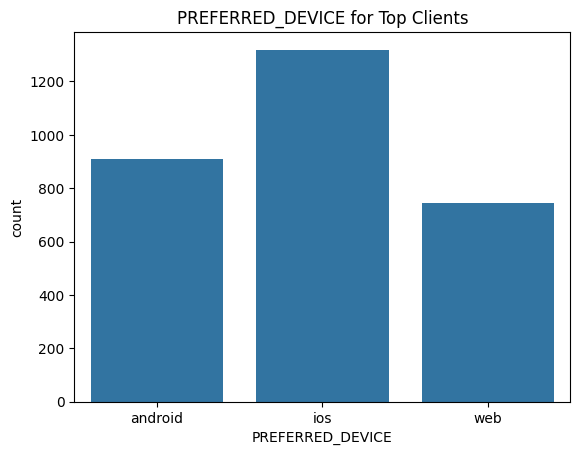

In [ ]:
top_clients = data_no_index[data_no_index['REVENUE_PER_MONTH'] > data_no_index['REVENUE_PER_MONTH'].quantile(0.75)]
# Preferred device
sns.countplot(data=top_clients, x='PREFERRED_DEVICE')
plt.title('PREFERRED_DEVICE for Top Clients')
plt.show()


So, we should focus on IOS app development

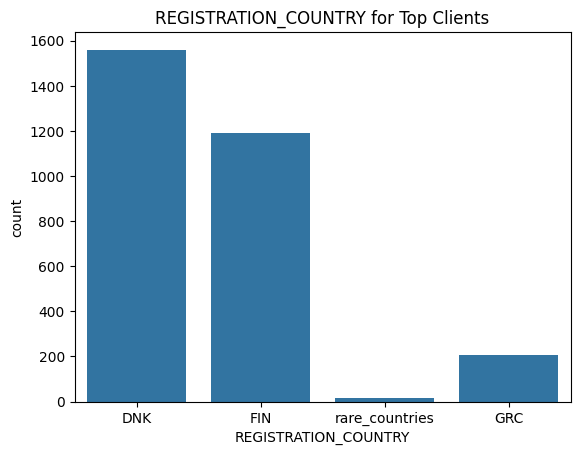

In [ ]:
# Registration country
sns.countplot(data=top_clients, x='REGISTRATION_COUNTRY')
plt.title('REGISTRATION_COUNTRY for Top Clients')
plt.show()


Here the data reveals that our focus should be on Danish users

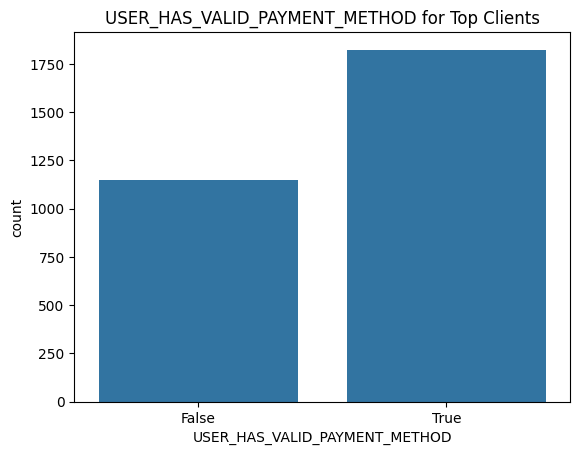

In [ ]:
# Has valid payment
sns.countplot(data=top_clients, x='USER_HAS_VALID_PAYMENT_METHOD')
plt.title('USER_HAS_VALID_PAYMENT_METHOD for Top Clients')
plt.show()


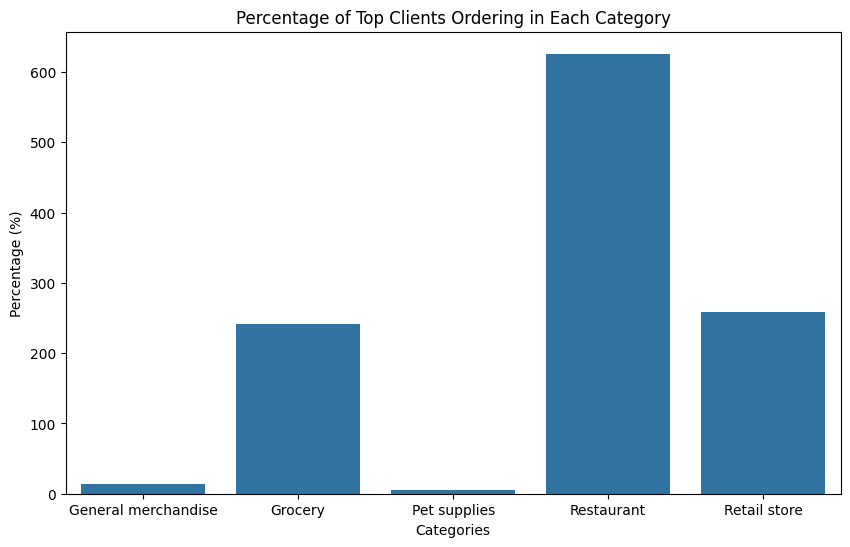

In [ ]:
# Order categories
categories = ['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']

category_percentages = top_clients[categories].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=category_percentages.index, y=category_percentages.values)
plt.title('Percentage of Top Clients Ordering in Each Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Categories')
plt.show()


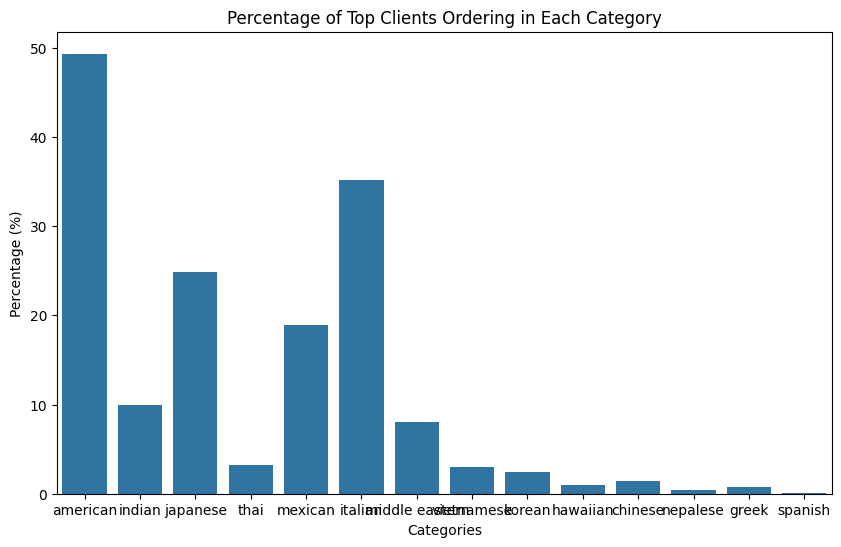

In [ ]:
# Restaurant types
categories = ['american', 'indian', 'japanese', 'thai', 'mexican',
       'italian', 'middle eastern', 'vietnamese', 'korean', 'hawaiian',
       'chinese', 'nepalese', 'greek', 'spanish']

category_percentages = top_clients[categories].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=category_percentages.index, y=category_percentages.values)
plt.title('Percentage of Top Clients Ordering in Each Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Categories')
plt.show()


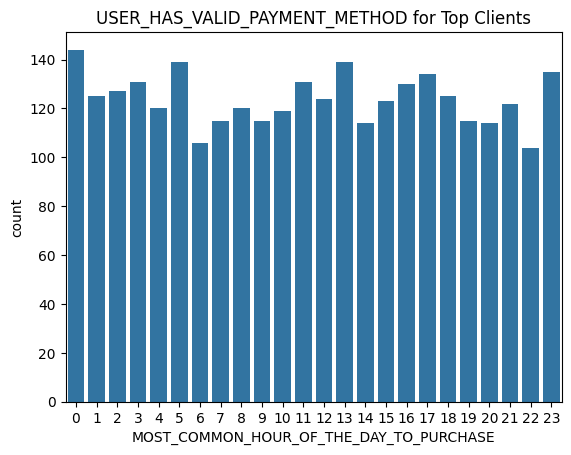

In [ ]:
# MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE
top_clients['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'] = top_clients['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].astype(int)
sns.countplot(data=top_clients, x='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE')
plt.title('USER_HAS_VALID_PAYMENT_METHOD for Top Clients')
plt.show()


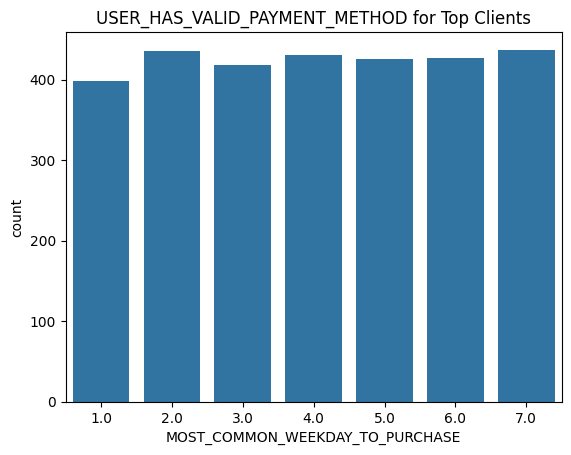

In [ ]:
# MOST_COMMON_WEEKDAY_TO_PURCHASE
sns.countplot(data=top_clients, x='MOST_COMMON_WEEKDAY_TO_PURCHASE')
plt.title('USER_HAS_VALID_PAYMENT_METHOD for Top Clients')
plt.show()


# Part 4. Predictions

## Part 4.1. Churn prediction

We identify key columns, excluding useless and obviously correlating ones:

In [ ]:
features_churn=['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'BREAKFAST_PURCHASES',
       'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES',
       'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'General merchandise', 'Grocery', 'Pet supplies', 'Restaurant',
       'Retail store', 'american', 'indian', 'japanese', 'thai', 'mexican',
       'italian', 'middle eastern', 'vietnamese', 'korean', 'hawaiian',
       'chinese', 'nepalese', 'greek', 'spanish',
       'ACTIVITY_PERIOD_MONTHS', 'ORDERS_PER_MONTH', 'REVENUE_PER_MONTH']

Define the feature matrix and target vector:

In [ ]:
X = data_no_index[features_churn]
y = data_no_index['churn']

Here we build the model:

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Transform categorical values
X_encoded = pd.get_dummies(X)

# Do the train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Create and fit the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Define the prediction
y_proba = model.predict_proba(X_test)[:, 1]

# Check it with the ROC_AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")


Result is `0.8646`, which is considered precise enough

Now we visualize the feature importance:

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=10)
plt.title("Top Features")
plt.show()

The distance of delivery, of course, hinders the will to buy, also the amount of months on the service makes its impact. Thus, we can conclude that the model works sane.

## Part 4.2. REVENUE_PER_MONTH regression

We also want to learn how to predict KPI of users - their revenue per month, based on their data

First, we define the span of cols we need (get rid of correlating ones and useless ones)

In [ ]:
regression_features = ['REGISTRATION_DATE', 'REGISTRATION_COUNTRY',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'BREAKFAST_PURCHASES',
       'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES',
       'LATE_NIGHT_PURCHASES', 'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'General merchandise', 'Grocery', 'Pet supplies', 'Restaurant',
       'Retail store', 'american', 'indian', 'japanese', 'thai', 'mexican',
       'italian', 'middle eastern', 'vietnamese', 'korean', 'hawaiian',
       'chinese', 'nepalese', 'greek', 'spanish',
       'ACTIVITY_PERIOD_MONTHS']

Then, we build the model prediction:

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Defining the feature matrix and target column
X = pd.get_dummies(data_no_index[regression_features])
y = data_no_index['REVENUE_PER_MONTH']

# Do the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit it with train data
model.fit(X_train, y_train)

# Build the prediction
y_pred = model.predict(X_test)

# Estimate it with common regression metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAPE: {mape:.4f}")
print(f"R^2: {r2:.4f}")

The result is reliable, since we have `95%` of the `REVENUE_PER_MONTH` predicted by our model with average deviance of `13.5%`, which is usually considered precise

Again, retrieve the feature importance:

In [ ]:
from xgboost import plot_importance
plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()

Max_purchase and Activity_period influence the monthly revenues the most. It corresponds with common sense, because it shows how loyal is the customer and how much does he trust the service.

# Part 4.3. Restaurant recomendations

I also propose to try to build a simple recommendation system for users - we want to predict their vector of restaurant preferences based on the other features:

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define binary restaurant cols
restaurant_cols = [
    'american', 'indian', 'japanese', 'thai', 'mexican', 'italian',
    'middle eastern', 'vietnamese', 'korean', 'hawaiian',
    'chinese', 'nepalese', 'greek', 'spanish'
]

# Getting rid of irrelevant features
exclude_cols = restaurant_cols + ['USER_ID', 'churn', 'REVENUE_PER_MONTH']
features = [col for col in data_no_index.columns if col not in exclude_cols]

# Defining features, target and split for train/test
X = pd.get_dummies(data_no_index[features], drop_first=True)
y = data_no_index[restaurant_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training models
base_clf =XGBClassifier()
multi_clf = MultiOutputClassifier(base_clf)
multi_clf.fit(X_train, y_train)

# Prediction
y_pred = multi_clf.predict(X_test)

# Estimating the precision with Hamming Loss, which is stably used for multi-output classification
from sklearn.metrics import hamming_loss
h_loss = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {h_loss:.4f}")

Result could be considered as somehow precise, because Hamming Loss shows the average fraction of mistakes. But this metric is too simple, just like my approach overall. So, to build a more effective recomendation system it may be more valuable so set up an A/B test or implement a neural network.